### Project: Machine learning to predict life expectancy

Global Health Estimates: Life expectancy and leading causes of death and disability

Dataset: https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy

#### Install Packages

In [18]:
#Imports
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#### Load File

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data.shape

(2938, 22)

In [5]:
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1784,Myanmar,2011,Developing,65.6,27.0,47,0.33,21.236988,4.0,2046,...,9.0,1.87,84.0,0.5,1186.423937,555331.0,13.0,13.3,0.526,9.1
2066,Portugal,2004,Developed,78.0,99.0,0,13.45,276.099980,94.0,5,...,95.0,9.84,95.0,0.1,1845.588100,1483861.0,0.7,0.6,0.792,15.9
2636,Tonga,2012,Developing,73.0,138.0,0,0.01,63.802950,77.0,0,...,79.0,4.51,77.0,0.1,451.542462,14951.0,0.1,0.1,0.717,14.4
1934,Oman,2007,Developing,74.9,113.0,1,0.57,88.450380,99.0,24,...,97.0,2.43,99.0,0.1,1585.132260,NaN,7.0,6.8,0.753,11.5
1927,Oman,2014,Developing,76.4,11.0,1,0.40,166.191373,99.0,0,...,99.0,3.55,99.0,0.1,2458.452260,NaN,7.1,6.9,0.796,13.7
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,...,99.0,5.65,99.0,0.1,11929.349910,NaN,3.3,3.3,0.782,14.1
663,Cuba,2009,Developing,78.1,11.0,1,4.01,818.877102,96.0,0,...,99.0,11.78,96.0,0.1,5484.776300,NaN,3.4,3.2,0.782,17.7
920,Finland,2009,Developing,79.7,91.0,0,9.96,579.738437,NaN,2,...,99.0,9.20,99.0,0.1,4717.155710,5338871.0,0.9,0.8,0.878,17.0
539,Chad,2004,Developing,48.5,45.0,44,0.34,72.384513,NaN,10324,...,31.0,5.72,21.0,5.2,454.676588,97143.0,1.7,1.6,0.301,5.6
1136,Haiti,2001,Developing,58.9,35.0,19,6.22,60.778159,NaN,159,...,52.0,5.63,45.0,5.0,413.738316,8692567.0,4.7,4.7,0.443,7.9


In [6]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Initial adjustment

exclude 'percentage expenditure', 'under-five deaths' e 'Income composition of resources'

In [8]:
df_data = pd.DataFrame({'country': data['Country'],
                        'life_expectancy': data['Life expectancy '],
                        'year': data['Year'],
                        'status': data['Status'],
                        'adult_mortality': data['Adult Mortality'],
                        'inf_death': data['infant deaths'],
                        'alcohol': data['Alcohol'],
                        'hepatitisB': data['Hepatitis B'],
                        'measles': data['Measles '],
                        'bmi': data[' BMI '],
                        'polio': data['Polio'],
                        'diphteria': data['Diphtheria '],
                        'hiv': data[' HIV/AIDS'],
                        'gdp': data['GDP'], 
                        'total_expenditure': data['Total expenditure'],
                        'thinesss_till19': data[' thinness  1-19 years'],
                        'thiness_till9': data[' thinness 5-9 years'],
                        'school': data['Schooling'],
                        'population': data[' Population']
                        })

In [9]:
df_data.shape

(2938, 19)

In [10]:
df_data.head()

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphteria,hiv,gdp,total_expenditure,thinesss_till19,thiness_till9,school,population
0,Afghanistan,65.0,2015,Developing,263.0,62,0.01,65.0,1154,19.1,6.0,65.0,0.1,584.259210,8.16,17.2,17.3,10.1,33736494.0
1,Afghanistan,59.9,2014,Developing,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0
2,Afghanistan,59.9,2013,Developing,268.0,66,0.01,64.0,430,18.1,62.0,64.0,0.1,631.744976,8.13,17.7,17.7,9.9,31731688.0
3,Afghanistan,59.5,2012,Developing,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0
4,Afghanistan,59.2,2011,Developing,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0


### Dictionary

In [11]:
df_dict = {
    "country": "Country of origin of data.",
    "life_expectancy": "Life expectancy at birth, in years.",
    "year": "Year in which data was collected.",
    "status": "Development status of the country ('Developing' for developing countries, 'Developed' for developed countries).",
    "adult_mortality": "Mortality rate of adults aged 15–60 per 1000 population.",
    "inf_death": "Number of deaths of children under 5 years of age per 1000 live births.",
    "alcohol": "Alcohol consumption per capita (liters of pure alcohol per year).",
    "hepatitisB": "Hepatitis B vaccination coverage in 1-year-old children (%).",
    "measles": "Number of measles cases reported per 1000 population.",
    "bmi": "Average body mass index of the adult population.",
    "polio": "Polio vaccination coverage in children aged 1 year (%).",
    "diphtheria": "Diphtheria, tetanus, and pertussis (DTP3) vaccination coverage in children aged 1 year (%).",
    "hiv": "HIV prevalence in the adult population (%).",
    "gdp": "Gross domestic product per capita (in US dollars).",
    "total_expenditure": "Total health expenditure as a percentage of GDP.",
    "thinness_till19": "Prevalence of thinness in children and adolescents aged 10–19 years (%).",
    "thinness_till9": "Prevalence of thinness in children aged 5–9 years (%).",
    "school": "Average number of years of schooling.",
    "population": "Total population of the country."
}

In [12]:
df_dict['adult_mortality']

'Mortality rate of adults aged 15–60 per 1000 population.'

In [13]:
df_dict['life_expectancy']

'Life expectancy at birth, in years.'

### EDA (Exploration)

<Axes: >

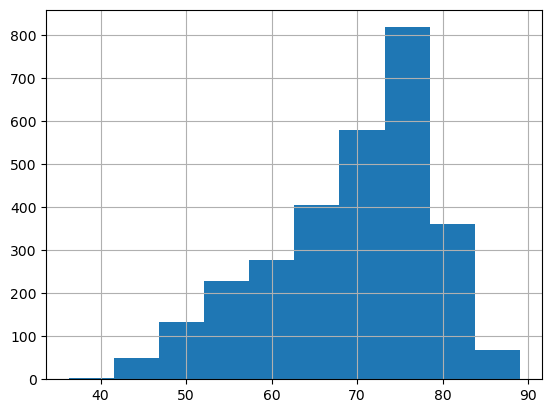

In [14]:
df_data['life_expectancy'].hist()

In [15]:
df_data.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphteria,hiv,gdp,total_expenditure,thinesss_till19,thiness_till9,school,population
count,2928.000000,2938.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
mean,69.224932,2007.518720,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,9.523867,4.613841,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,36.300000,2000.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,63.100000,2004.000000,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,72.100000,2008.000000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,75.700000,2012.000000,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,17.60000,27.700000,28.600000,20.700000,1.293859e+09


In [16]:
df_data.describe(include=['object'])

,country,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [17]:
df_data.describe(include='all')

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphteria,hiv,gdp,total_expenditure,thinesss_till19,thiness_till9,school,population
count,2938,2928.000000,2938.000000,2938,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
unique,193,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,69.224932,2007.518720,NaN,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,NaN,9.523867,4.613841,NaN,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,NaN,36.300000,2000.000000,NaN,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,NaN,63.100000,2004.000000,NaN,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,NaN,72.100000,2008.000000,NaN,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,NaN,75.700000,2012.000000,NaN,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06


In [25]:
## Function target with all

def get_pairs(data, target, attributes, n):
    
    lines_groups = [attributes[i:i+n] for i in range (0, len (attributes), n)]
    
    for line in lines_groups:
        plot = sns.pairplot(x_vars=line, y_vars=target, data= data, kind="reg", height=3)
    return

In [20]:
target = ['life_expectancy']

In [21]:
attributes = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school']

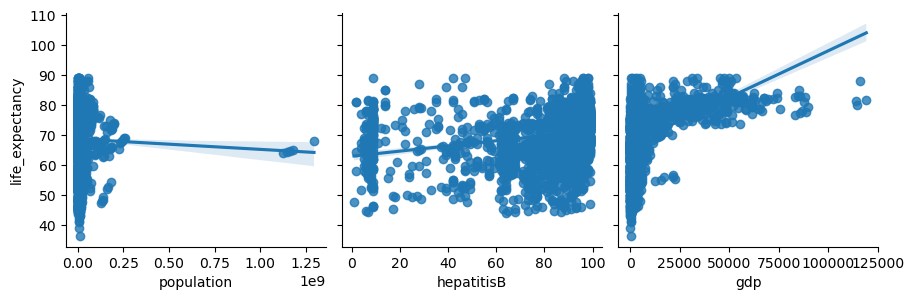

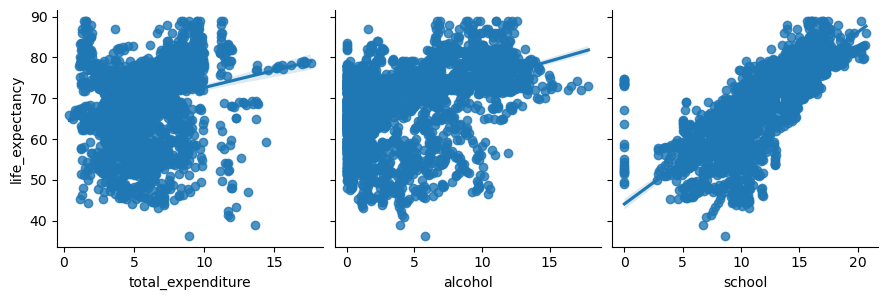

In [26]:
get_pairs(df_data, target, attributes, 3)

### Missing Values

In [29]:
df_data.count()

country              2938
life_expectancy      2928
year                 2938
status               2938
adult_mortality      2928
inf_death            2938
alcohol              2744
hepatitisB           2385
measles              2938
bmi                  2904
polio                2919
diphteria            2919
hiv                  2938
gdp                  2490
total_expenditure    2712
thinesss_till19      2904
thiness_till9        2904
school               2775
population           2286
dtype: int64

In [30]:
df_data.isnull().values.any()

True

In [31]:
df_data.isnull().sum().sort_values(ascending=False)

population           652
hepatitisB           553
gdp                  448
total_expenditure    226
alcohol              194
school               163
thiness_till9         34
thinesss_till19       34
bmi                   34
polio                 19
diphteria             19
life_expectancy       10
adult_mortality       10
hiv                    0
measles                0
inf_death              0
status                 0
year                   0
country                0
dtype: int64

In [33]:
# Percentual missing
percent_missing = (df_data.isnull().sum().sort_values(ascending=False))/ df_data.shape[0] *100
percent_missing

population           22.191967
hepatitisB           18.822328
gdp                  15.248468
total_expenditure     7.692308
alcohol               6.603131
school                5.547992
thiness_till9         1.157250
thinesss_till19       1.157250
bmi                   1.157250
polio                 0.646698
diphteria             0.646698
life_expectancy       0.340368
adult_mortality       0.340368
hiv                   0.000000
measles               0.000000
inf_death             0.000000
status                0.000000
year                  0.000000
country               0.000000
dtype: float64

In [34]:
## Duplicated
df_data.columns.duplicated().sum()

0

### Outliers

In [35]:
new_df = df_data[attributes]

In [36]:
## IQR
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

In [45]:
outliers = ((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)
outliers

gdp                  365
population           294
hepatitisB           254
school                44
total_expenditure     32
alcohol                0
dtype: int64

In [47]:
# Summary
outliers_summary = pd.DataFrame({'Outliers': outliers, 'Percent': (outliers/len(new_df)) * 100})
outliers_summary

,Outliers,Percent
gdp,365,12.423417
population,294,10.006807
hepatitisB,254,8.645337
school,44,1.497617
total_expenditure,32,1.089176
alcohol,0,0.000000


### Remove Outliers

In [48]:
## Limit Outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [49]:
new_data = df_data[~((new_df < lower_limit) | (new_df > upper_limit)).any(axis=1)]

In [50]:
new_data.shape

(2044, 19)

In [51]:
new_data.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphteria,hiv,gdp,total_expenditure,thinesss_till19,thiness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [52]:
new_data.population.max()

17899562.0

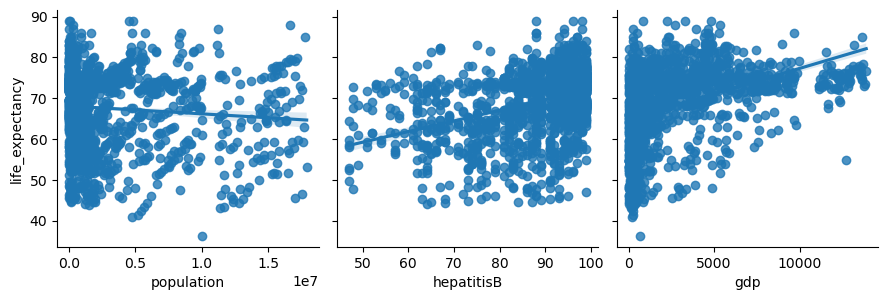

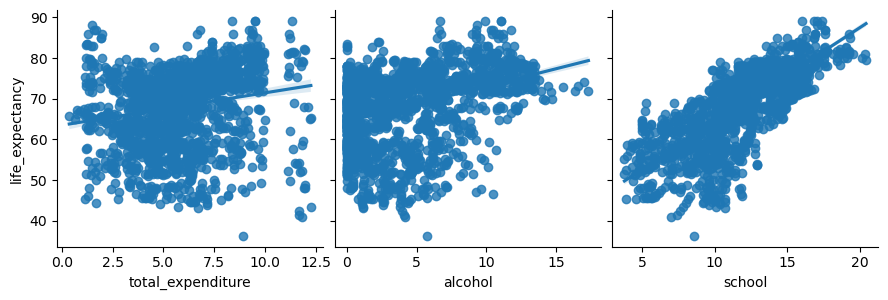

In [53]:
get_pairs(new_data, target, attributes, 3)

### Filling missing

In [62]:
### Filling with median

# Percentual missing
percent_missing_values = (new_data.isnull().sum().sort_values(ascending=False)) / new_data.shape[0] *100
percent_missing_values

population           24.168297
hepatitisB           19.129159
gdp                  18.395303
total_expenditure     7.876712
alcohol               6.653620
school                6.555773
thiness_till9         0.587084
thinesss_till19       0.587084
bmi                   0.587084
life_expectancy       0.391389
adult_mortality       0.391389
polio                 0.146771
diphteria             0.146771
hiv                   0.000000
measles               0.000000
inf_death             0.000000
status                0.000000
year                  0.000000
country               0.000000
dtype: float64

In [63]:
## Function Replace

def impute_median(data):
    return data.fillna(data.median())

In [64]:
new_data.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphteria,hiv,gdp,total_expenditure,thinesss_till19,thiness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [66]:
### 
new_data.population = new_data['population'].transform(impute_median)
new_data.hepatitisB = new_data['hepatitisB'].transform(impute_median)
new_data.alcohol = new_data['alcohol'].transform(impute_median)
new_data.total_expenditure = new_data['total_expenditure'].transform(impute_median)
new_data.gdp = new_data['gdp'].transform(impute_median)
new_data.school = new_data['school'].transform(impute_median)

C:\Users\User\AppData\Local\Temp\ipykernel_38636\4230959821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.population = new_data['population'].transform(impute_median)
C:\Users\User\AppData\Local\Temp\ipykernel_38636\4230959821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.hepatitisB = new_data['hepatitisB'].transform(impute_median)
C:\Users\User\AppData\Local\Temp\ipykernel_38636\4230959821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [67]:
# Percentual missing
percent_missing_values = (new_data.isnull().sum().sort_values(ascending=False)) / new_data.shape[0] *100
percent_missing_values

bmi                  0.587084
thiness_till9        0.587084
thinesss_till19      0.587084
adult_mortality      0.391389
life_expectancy      0.391389
diphteria            0.146771
polio                0.146771
school               0.000000
total_expenditure    0.000000
gdp                  0.000000
hiv                  0.000000
country              0.000000
measles              0.000000
hepatitisB           0.000000
alcohol              0.000000
inf_death            0.000000
status               0.000000
year                 0.000000
population           0.000000
dtype: float64

In [68]:
## Remove missing values
new_data.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_38636\2103449597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.dropna(inplace=True)


In [69]:
# Percentual missing
percent_missing_values = (new_data.isnull().sum().sort_values(ascending=False)) / new_data.shape[0] *100
percent_missing_values

country              0.0
polio                0.0
school               0.0
thiness_till9        0.0
thinesss_till19      0.0
total_expenditure    0.0
gdp                  0.0
hiv                  0.0
diphteria            0.0
bmi                  0.0
life_expectancy      0.0
measles              0.0
hepatitisB           0.0
alcohol              0.0
inf_death            0.0
adult_mortality      0.0
status               0.0
year                 0.0
population           0.0
dtype: float64

In [70]:
new_data.shape

(2023, 19)

In [71]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2023 entries, 1 to 2937
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2023 non-null   object 
 1   life_expectancy    2023 non-null   float64
 2   year               2023 non-null   int64  
 3   status             2023 non-null   object 
 4   adult_mortality    2023 non-null   float64
 5   inf_death          2023 non-null   int64  
 6   alcohol            2023 non-null   float64
 7   hepatitisB         2023 non-null   float64
 8   measles            2023 non-null   int64  
 9   bmi                2023 non-null   float64
 10  polio              2023 non-null   float64
 11  diphteria          2023 non-null   float64
 12  hiv                2023 non-null   float64
 13  gdp                2023 non-null   float64
 14  total_expenditure  2023 non-null   float64
 15  thinesss_till19    2023 non-null   float64
 16  thiness_till9      2023 non-n

In [72]:
## Remove categorical variables

new_data.drop(['country', 'status'], axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_38636\872278707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(['country', 'status'], axis=1, inplace=True)


In [73]:
new_data.shape

(2023, 17)

#### Attribute engineering

In [74]:
### New variable = 'life_style'

new_data['lifestyle'] = 0
new_data.lifestyle = new_data['bmi'] * new_data['alcohol']

C:\Users\User\AppData\Local\Temp\ipykernel_38636\4108099220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['lifestyle'] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_38636\4108099220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.lifestyle = new_data['bmi'] * new_data['alcohol']


In [75]:
new_data.head()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphteria,hiv,gdp,total_expenditure,thinesss_till19,thiness_till9,school,population,lifestyle
1,59.9,2014,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0,0.186
3,59.5,2012,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0,0.176
4,59.2,2011,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0,0.172
5,58.8,2010,279.0,74,0.01,66.0,1989,16.7,66.0,66.0,0.1,553.328940,9.20,18.4,18.4,9.2,2883167.0,0.167
6,58.6,2009,281.0,77,0.01,63.0,2861,16.2,63.0,63.0,0.1,445.893298,9.42,18.6,18.7,8.9,284331.0,0.162


In [77]:
new_data.lifestyle.describe()

count    2023.000000
mean      178.996408
std       209.416553
min         0.018000
25%        18.140500
50%        95.323000
75%       257.394000
max      1036.869000
Name: lifestyle, dtype: float64

In [78]:
# Percentual missing
percent_missing_values = (new_data.isnull().sum().sort_values(ascending=False)) / new_data.shape[0] *100
percent_missing_values

life_expectancy      0.0
year                 0.0
population           0.0
school               0.0
thiness_till9        0.0
thinesss_till19      0.0
total_expenditure    0.0
gdp                  0.0
hiv                  0.0
diphteria            0.0
polio                0.0
bmi                  0.0
measles              0.0
hepatitisB           0.0
alcohol              0.0
inf_death            0.0
adult_mortality      0.0
lifestyle            0.0
dtype: float64

In [79]:
new_data.dtypes

life_expectancy      float64
year                   int64
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphteria            float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinesss_till19      float64
thiness_till9        float64
school               float64
population           float64
lifestyle            float64
dtype: object

### Correlation analysis

In [80]:
new_data.corr()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphteria,hiv,gdp,total_expenditure,thinesss_till19,thiness_till9,school,population,lifestyle
life_expectancy,1.000000,0.204556,-0.658916,-0.206443,0.342425,0.257860,-0.115350,0.557954,0.452564,0.483659,-0.573127,0.360736,0.175738,-0.433580,-0.429357,0.708272,-0.105317,0.441366
year,0.204556,1.000000,-0.091760,-0.059838,-0.066639,-0.003178,-0.064347,0.096763,0.147489,0.228939,-0.158820,0.170945,0.070267,-0.059353,-0.055950,0.219471,0.020981,-0.017373
adult_mortality,-0.658916,-0.091760,1.000000,0.099370,-0.149204,-0.188950,0.035432,-0.366745,-0.228938,-0.221803,0.512978,-0.197863,-0.090963,0.299104,0.302507,-0.383901,0.096768,-0.231128
inf_death,-0.206443,-0.059838,0.099370,1.000000,-0.127545,-0.122515,0.480129,-0.221948,-0.183569,-0.183910,0.039115,-0.120331,-0.121871,0.321487,0.354512,-0.214215,0.111901,-0.156769
alcohol,0.342425,-0.066639,-0.149204,-0.127545,1.000000,0.193844,-0.045324,0.310448,0.187916,0.199958,-0.036268,0.289360,0.262657,-0.386629,-0.379482,0.464657,-0.007040,0.878858
hepatitisB,0.257860,-0.003178,-0.188950,-0.122515,0.193844,1.000000,-0.043089,0.115409,0.393191,0.391270,-0.090390,0.167829,0.046093,-0.086406,-0.102546,0.263879,-0.056455,0.181579
measles,-0.115350,-0.064347,0.035432,0.480129,-0.045324,-0.043089,1.000000,-0.142187,-0.110853,-0.123043,0.024412,-0.065666,-0.101675,0.133515,0.137056,-0.089084,-0.005326,-0.085123
bmi,0.557954,0.096763,-0.366745,-0.221948,0.310448,0.115409,-0.142187,1.000000,0.253961,0.273612,-0.244626,0.323198,0.200959,-0.541904,-0.550691,0.552766,-0.056945,0.599062
polio,0.452564,0.147489,-0.228938,-0.183569,0.187916,0.393191,-0.110853,0.253961,1.000000,0.676507,-0.143756,0.198453,0.141294,-0.166819,-0.166363,0.382712,-0.045542,0.219793
diphteria,0.483659,0.228939,-0.221803,-0.183910,0.199958,0.391270,-0.123043,0.273612,0.676507,1.000000,-0.154179,0.222266,0.157976,-0.189487,-0.186992,0.430627,-0.035142,0.225132


In [84]:
#### Function table

def filter_view_corr(df, threshold, drop_column = None):
    
    corr = df.corr()
    
    filter = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtred = corr.where(filter).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    
    if drop_column:
        df_filtred = df_filtred.drop(index = drop_column,
                                     errors ='ignore').drop(columns = drop_column,
                                                           errors = 'ignore')
    
    
    plt.figure(figsize= (8, 6))                                    
    sns.heatmap(df_filtred, annot= True, cmap = 'coolwarm', center = 0)
    plt.show()


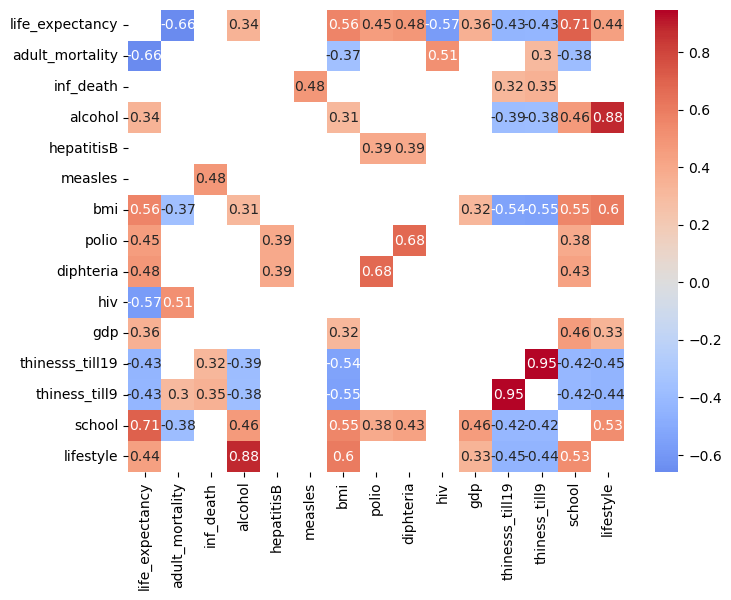

In [85]:
filter_view_corr(new_data, threshold= 0.3, drop_column=None)

The variables adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school and lifestyle meet our criteria. They are the predictor variables with the highest correlation with the target variable.

#### Identify possible multicollinearity problems (high correlation between predictor variables)

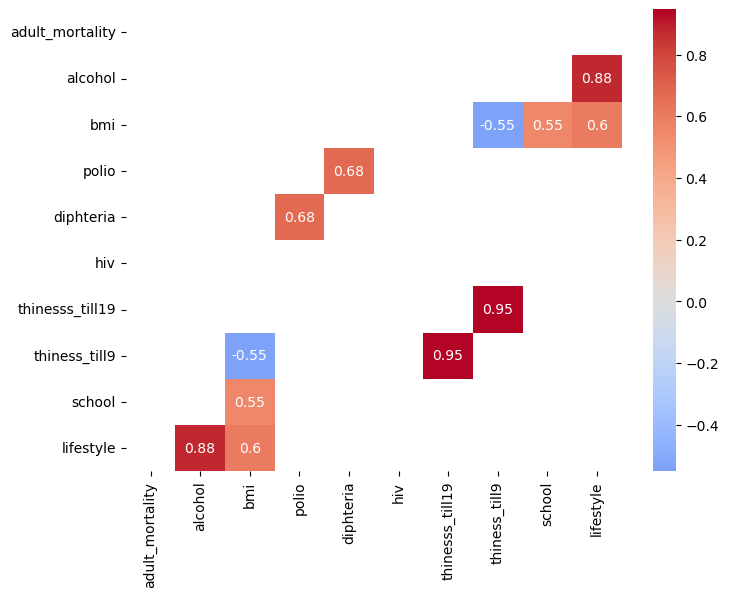

In [86]:
filter_view_corr(new_data, threshold= 0.55, drop_column='life_expectancy')

**First Filter - Correlation with the Target Variable**

The variables adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school and lifestyle meet our first criterion. They are the predictor variables with the highest correlation with the target variable.

**Second Filter - Multicollinearity**

Based on the multicollinearity filter, the variables adult_mortality, diphtheria, hiv, gdp, thinness_till19, school and lifestyle will be the variables maintained for statistical modeling.

In [89]:
## Prepare new dataset

new_data_final = pd.DataFrame({'life_expectancy': new_data['life_expectancy'],
                              'adult_mortality': new_data['adult_mortality'],
                              'diphteria': new_data['diphteria'],
                              'hiv': new_data['hiv'],
                              'gdp': new_data['gdp'],
                              'thinesss_till19': new_data['thinesss_till19'],
                              'school': new_data['school'],
                              'lifestyle': new_data['lifestyle'],
})

In [90]:
new_data_final.head()

,life_expectancy,adult_mortality,diphteria,hiv,gdp,thinesss_till19,school,lifestyle
1,59.9,271.0,62.0,0.1,612.696514,17.5,10.0,0.186
3,59.5,272.0,67.0,0.1,669.959000,17.9,9.8,0.176
4,59.2,275.0,68.0,0.1,63.537231,18.2,9.5,0.172
5,58.8,279.0,66.0,0.1,553.328940,18.4,9.2,0.167
6,58.6,281.0,63.0,0.1,445.893298,18.6,8.9,0.162


In [91]:
new_data_final.isnull().sum().sort_values(ascending=False)

life_expectancy    0
adult_mortality    0
diphteria          0
hiv                0
gdp                0
thinesss_till19    0
school             0
lifestyle          0
dtype: int64

In [92]:
new_data_final.count()

life_expectancy    2023
adult_mortality    2023
diphteria          2023
hiv                2023
gdp                2023
thinesss_till19    2023
school             2023
lifestyle          2023
dtype: int64

In [93]:
new_data_final.dtypes

life_expectancy    float64
adult_mortality    float64
diphteria          float64
hiv                float64
gdp                float64
thinesss_till19    float64
school             float64
lifestyle          float64
dtype: object

In [94]:
new_data_final.shape

(2023, 8)

##### Find Most relevant variables

RandomForest  

In [95]:
### Variables X and Y

X = new_data_final.drop('life_expectancy', axis=1)
y = new_data_final['life_expectancy']

In [96]:
### Split and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [97]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [98]:
y_pred = model.predict(X_test)

In [99]:
# Avaliation
mse = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [100]:
print(f"RMSE: {rmse}")

RMSE: 1.1299885282931308


In [101]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))

R2 Score: 0.9535079541206163


In [102]:
### Importance variables
importances = model.feature_importances_
variables = X.columns

In [103]:
importances_df = pd.DataFrame({'Variable': variables, 'Importance': importances}).sort_values(by = 'Importance', ascending=False)

In [104]:
print(importances_df)

          Variable  Importance
2              hiv    0.607101
0  adult_mortality    0.224181
5           school    0.073162
4  thinesss_till19    0.037829
6        lifestyle    0.031248
1        diphteria    0.017064
3              gdp    0.009415


The results show the relative importance of the variables in the RandomForest model. Importance is a measure of how much each variable contributes to the accuracy of the model. Here is an interpretation of the results, ordered from most to least important:

**HIV**: This is the most important variable, contributing approximately 60.71% to the model’s performance. This indicates that HIV prevalence in the dataset has the largest impact on life expectancy, which is consistent with the general understanding that HIV is a serious public health issue that can significantly reduce life expectancy.

**Adult Mortality**: Adult mortality is the second most important variable, contributing approximately 22.42% to the model’s accuracy. This suggests that adult mortality rates have a significant impact on determining life expectancy, which makes sense since higher adult mortality rates generally indicate poorer health and living conditions.

**School**: Education appears as the third most important variable, at 7.32%. This may reflect the role of education in promoting healthy lifestyles and access to better healthcare, both of which may contribute to longer life expectancy.

**Thinness till 19**: Thinness till age 19 has a significance of 3.78%, indicating a smaller but still significant relationship with life expectancy. This may be related to nutritional and health issues during the formative years, which may have lasting effects on overall health.

**Lifestyle**: Lifestyle has a contribution of 3.12%, suggesting that lifestyle factors, possibly captured by this variable, have a moderate impact on life expectancy.

**Diphtheria**: The significance of the diphtheria vaccination rate is relatively low. However, this may reflect high immunization rates or the effectiveness of available treatments.

**GDP**: Gross Domestic Product (GDP) has the lowest significance in the model, at just 0.94%. This may indicate that, within the specific dataset and in the context of the other variables included, the economic wealth of the country is less directly related to life expectancy than health and education factors.

Let’s remove the least relevant variable, gdp in this case, from the dataset.

In [105]:
new_data_final = new_data_final.drop('gdp', axis=1)

In [106]:
new_data_final.head()

,life_expectancy,adult_mortality,diphteria,hiv,thinesss_till19,school,lifestyle
1,59.9,271.0,62.0,0.1,17.5,10.0,0.186
3,59.5,272.0,67.0,0.1,17.9,9.8,0.176
4,59.2,275.0,68.0,0.1,18.2,9.5,0.172
5,58.8,279.0,66.0,0.1,18.4,9.2,0.167
6,58.6,281.0,63.0,0.1,18.6,8.9,0.162


#### Pre-processing

In [107]:
## Split
X = new_data_final[['hiv', 'adult_mortality', 'school', 'thinesss_till19', 'lifestyle', 'diphteria']].values
y = new_data_final.life_expectancy.values.reshape(-1, 1)

In [108]:
# Split
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size= 0.2, random_state=0)

In [109]:
len(x_treino)

1618

In [110]:
len(y_treino)

1618

In [111]:
len(x_teste)

405

In [113]:
len(y_teste)

405

In [114]:
df_scaler = StandardScaler()

In [115]:
df_scaler.fit(x_treino)

StandardScaler()

In [117]:
## Scaler treino and teste
x_treino_scaled = df_scaler.transform(x_treino)
x_teste_scaled = df_scaler.transform(x_teste)

In [118]:
x_treino_scaled

array([[-0.34334205, -0.85524839,  0.10802935, -0.86204293, -0.84891799,
         0.70515531],
       [ 0.64880751,  1.68585097, -2.61357537,  0.93586882, -0.47324134,
        -0.14714147],
       [-0.34334205, -0.22594793,  1.03910464, -0.39409329,  0.93636789,
         0.70515531],
       ...,
       [-0.19070365,  1.35925199,  0.10802935,  0.66495062, -0.8494992 ,
        -3.79307769],
       [ 0.11457313,  0.02099276,  0.14383993, -0.29557758,  0.50064623,
        -0.28919093],
       [-0.05714506,  0.73791735, -1.03790948,  0.64032169, -0.84916572,
         0.61045567]])

In [119]:
x_treino_scaled.shape

(1618, 6)

In [120]:
x_teste_scaled.shape

(405, 6)

### Predictive Model

##### V.1 Linear Regression

In [121]:
model_v1 = LinearRegression()

In [122]:
model_v1.fit(x_treino_scaled, y_treino)

LinearRegression()

In [123]:
print("Coeficients:  \n" , model_v1.coef_)

Coeficients:  
 [[-2.60945231 -2.55990637  3.69012812 -0.50572504  0.51432364  1.65310184]]


In [124]:
#Predictions
y_pred_treino_v1 = model_v1.predict(x_treino_scaled)

In [125]:
#Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v1)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v1))

Mean Absolute Error: 3.2946474021136094
Mean Squared Error: 19.41256033555363
Root Mean Squared Error: 4.405968717042103
R2 Score: 0.7690571526327722


##### Avaliation

In [126]:
y_pred_teste_v1 = model_v1.predict(x_teste)

In [127]:
df_predicts = pd.DataFrame({'Real_value': y_teste.flatten(), 'Predict_value': y_pred_teste_v1.flatten()})

In [128]:
df_predicts.head()

,Real_value,Predict_value
0,56.8,-682.417973
1,72.7,252.125517
2,62.3,-489.457340
3,63.9,-301.689478
4,69.4,-119.635582


Oppsss

In [129]:
y_pred_teste_v1 = model_v1.predict(x_teste_scaled)

In [130]:
df_predicts = pd.DataFrame({'Real_value': y_teste.flatten(), 'Predict_value': y_pred_teste_v1.flatten()})

In [131]:
df_predicts.head()

,Real_value,Predict_value
0,56.8,57.628509
1,72.7,75.063364
2,62.3,61.993642
3,63.9,70.469820
4,69.4,70.268508


In [132]:
## function dispersion
def fig_scatter (x, y, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize = (10, 6))
    
    ax.scatter(x, y, color = 'blue', alpha = 0.3)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return

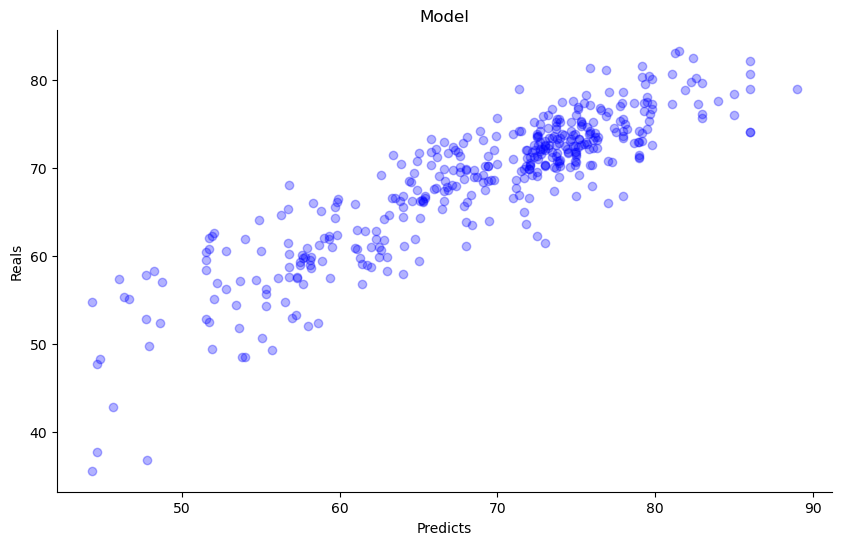

In [133]:
fig_scatter(df_predicts.Real_value, df_predicts.Predict_value, 'Model', 'Predicts', 'Reals')

In [134]:
# Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v1)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v1))

Mean Absolute Error: 3.2661894517215466
Mean Squared Error: 17.857320129264732
Root Mean Squared Error: 4.225792248710854
R2 Score: 0.7895014895328251


In [188]:
rmse_v1 = metrics.mean_absolute_error(y_teste, y_pred_teste_v1)
rmse_v1

3.2661894517215466

In [189]:
r2_score_v1 = metrics.r2_score(y_teste, y_pred_teste_v1)
r2_score_v1

0.7895014895328251

##### V.2 Lasso Regression (L1)

In [135]:
model_v2 = Lasso(alpha=1.0)

In [136]:
model_v2.fit(x_treino_scaled, y_treino)

Lasso()

In [137]:
y_pred_treino_v2 = model_v2.predict(x_treino_scaled)

In [141]:
### Metrics in train
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v2)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v2))

Mean Absolute Error: 3.5248340682223116
Mean Squared Error: 21.865597110276294
Root Mean Squared Error: 4.676066414228555
R2 Score: 0.7398744334211583


In [142]:
# predicts in test

y_pred_teste_v2 = model_v2.predict(x_teste_scaled)

In [143]:
# Metrics in test 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v2)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v2))

Mean Absolute Error: 3.562012369887744
Mean Squared Error: 21.236939500307503
Root Mean Squared Error: 4.60835540082441
R2 Score: 0.7496632137780741


In [186]:
rmse_v2 = metrics.mean_absolute_error(y_teste, y_pred_teste_v2)
rmse_v2

3.562012369887744

In [187]:
r2_score_v2 = metrics.r2_score(y_teste, y_pred_teste_v2)
r2_score_v2

0.7496632137780741

##### V.3 Ridge Regression (L2)

In [144]:
model_v3 = Ridge(alpha=1.0)

In [145]:
model_v3.fit(x_treino_scaled, y_treino)

Ridge()

In [146]:
y_pred_treino_v3 = model_v3.predict(x_treino_scaled)

In [147]:
## Metrics in train
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v3)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v3))

Mean Absolute Error: 3.2947409386562523
Mean Squared Error: 19.41256839691876
Root Mean Squared Error: 4.405969631865245
R2 Score: 0.7690570567301923


In [148]:
### predicts in train
y_pred_teste_v3 = model_v3.predict(x_teste_scaled)

In [149]:
## Metrics in test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v3)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v3))

Mean Absolute Error: 3.2662971013103372
Mean Squared Error: 17.85792984451091
Root Mean Squared Error: 4.225864390217806
R2 Score: 0.7894943023317109


In [183]:
rmse_v3 = metrics.mean_absolute_error(y_teste, y_pred_teste_v3)
rmse_v3

3.2662971013103372

In [185]:
r2_score_v3 = metrics.r2_score(y_teste, y_pred_teste_v3)
r2_score_v3

0.7894943023317109

##### V.4 Elastic Net Regression (L2)

In [150]:
model_v4 = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [151]:
model_v4.fit(x_treino_scaled, y_treino)

ElasticNet()

In [152]:
# Predicts in train
y_pred_treino_v4 = model_v4.predict(x_treino_scaled)

In [153]:
## Metrics in train
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v4)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v4))

Mean Absolute Error: 3.7600839612120556
Mean Squared Error: 23.780726049354367
Root Mean Squared Error: 4.876548579615953
R2 Score: 0.7170909714449432


In [154]:
y_pred_teste_v4 = model_v4.predict(x_teste_scaled)

In [155]:
## Metrics in test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v4)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v4))

Mean Absolute Error: 3.7892029277347117
Mean Squared Error: 23.216197494635203
Root Mean Squared Error: 4.818318949035566
R2 Score: 0.7263321172518125


In [181]:
rmse_v4 = metrics.mean_absolute_error(y_teste, y_pred_teste_v4)
rmse_v4

3.7892029277347117

In [182]:
r2_score_v4 = metrics.r2_score(y_teste, y_pred_teste_v4)
r2_score_v4

0.7263321172518125

##### V.5 Parameter Optimization

In [156]:
model_v5 = Ridge()

In [157]:
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [158]:
grid_search = GridSearchCV(estimator= model_v5, param_grid= parameters, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [159]:
grid_search.fit(x_treino_scaled, y_treino)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [160]:
best_model = grid_search.best_estimator_

In [161]:
y_pred_treino_v5 = grid_search.predict(x_treino_scaled)

In [162]:
# Print metrics in train
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v5)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v5))

Mean Absolute Error: 3.295747537684254
Mean Squared Error: 19.41335480629512
Root Mean Squared Error: 4.406058874583398
R2 Score: 0.7690477011574377


In [163]:
y_pred_teste_v5 = best_model.predict(x_teste_scaled)

In [164]:
# Print metrics in test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v5)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v5))

Mean Absolute Error: 3.2672750615943604
Mean Squared Error: 17.8642215366659
Root Mean Squared Error: 4.226608751311848
R2 Score: 0.7894201371256577


In [179]:
rmse_v5 = metrics.mean_absolute_error(y_teste, y_pred_teste_v5)
rmse_v5

3.2672750615943604

In [180]:
r2_score_v5= metrics.r2_score(y_teste, y_pred_teste_v5)
r2_score_v5

0.7894201371256577

In [165]:
## Hiperparmeters
print('Best alpha:', grid_search.best_params_['alpha'])

Best alpha: 10


#### Select Model

In [166]:
print('RMSE V1:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v1)))
print('RMSE V2:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v2)))
print('RMSE V3:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v3)))
print('RMSE V4:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v4)))
print('RMSE V5:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v5)))

RMSE V1: 4.225792248710854
RMSE V2: 4.60835540082441
RMSE V3: 4.225864390217806
RMSE V4: 4.818318949035566
RMSE V5: 4.226608751311848


In [167]:
print('R2 Score Modelo V1:', metrics.r2_score(y_teste, y_pred_teste_v1))
print('R2 Score Modelo V2:', metrics.r2_score(y_teste, y_pred_teste_v2))
print('R2 Score Modelo V3:', metrics.r2_score(y_teste, y_pred_teste_v3))
print('R2 Score Modelo V4:', metrics.r2_score(y_teste, y_pred_teste_v4))
print('R2 Score Modelo V5:', metrics.r2_score(y_teste, y_pred_teste_v5))

R2 Score Modelo V1: 0.7895014895328251
R2 Score Modelo V2: 0.7496632137780741
R2 Score Modelo V3: 0.7894943023317109
R2 Score Modelo V4: 0.7263321172518125
R2 Score Modelo V5: 0.7894201371256577


In [213]:
results = pd.DataFrame({'Regression': ['V1_LinearRegression', 'V2_Lasso', 'V3_Ridge', 'V4_ElasticNet', 'V5_Ridge_GridSearch'],
                             'Rmse': [rmse_v1, rmse_v2, rmse_v3, rmse_v4, rmse_v5],
                             'R2_score': [r2_score_v1, r2_score_v2, r2_score_v3, r2_score_v4, r2_score_v5]})

In [210]:
results

,Regression,Rmse,R2_score
0,V1_LinearRegression,3.266189,0.789501
1,V2_Lasso,3.562012,0.749663
2,V3_Ridge,3.266297,0.789494
3,V4_ElasticNet,3.789203,0.726332
4,V5_Ridge_GridSearch,3.267275,0.789420


In [212]:
results.sort_values(by = 'R2_score', ascending = False)

,Regression,Rmse,R2_score
0,V1_LinearRegression,3.266189,0.789501
2,V3_Ridge,3.266297,0.789494
4,V5_Ridge_GridSearch,3.267275,0.789420
1,V2_Lasso,3.562012,0.749663
3,V4_ElasticNet,3.789203,0.726332


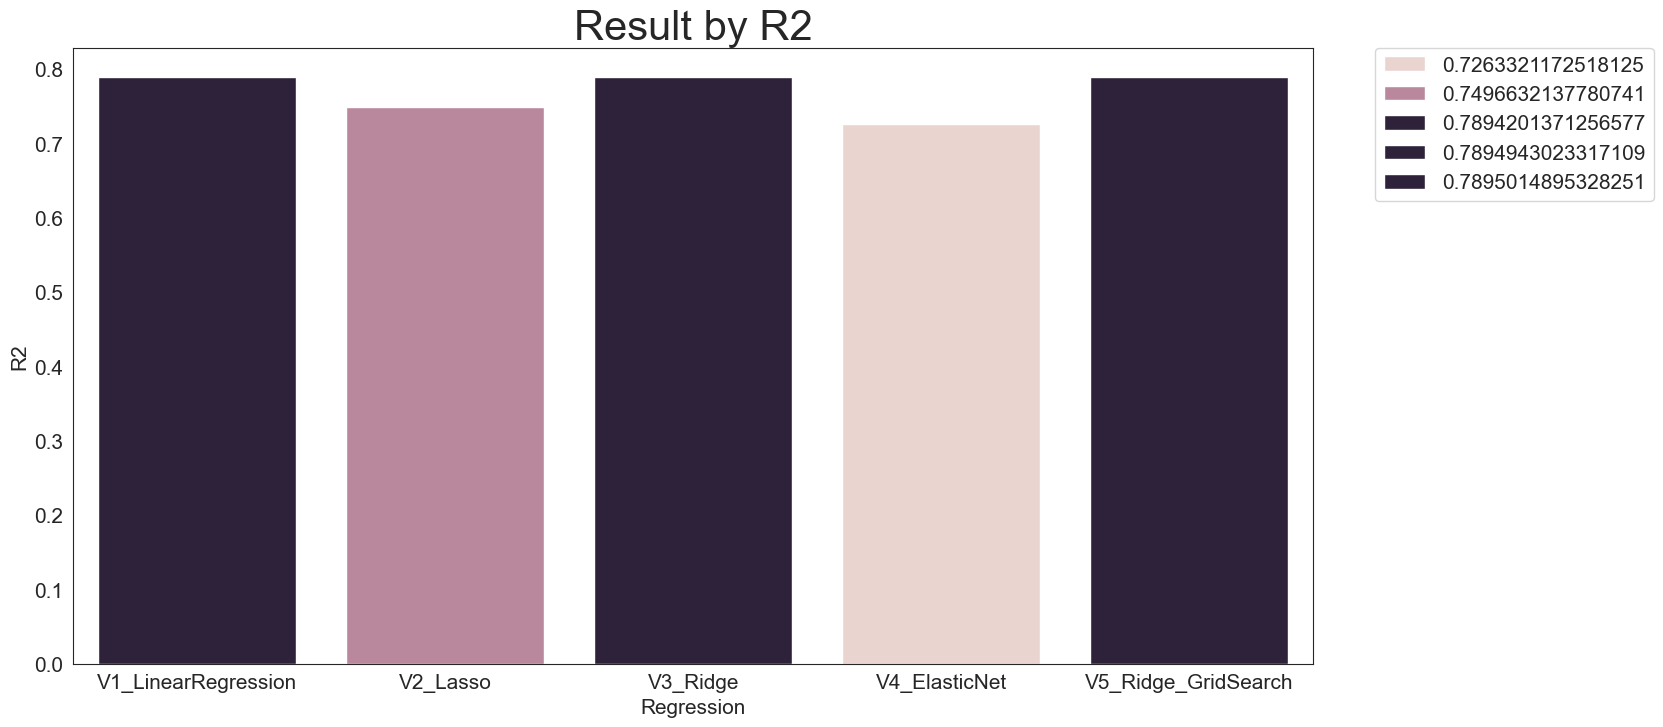

In [219]:
# Construção do Plot
sns.set_style("white")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'Regression', y = 'R2_score', hue = 'R2_score', data = results,)
ax.set_xlabel('Regression', fontsize = 15)
ax.set_ylabel('R2', fontsize = 15)
ax.tick_params(labelsize = 15)
ax.set_title('Result by R2', fontsize = 30)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [202]:
results.sort_values(by = 'rmse', ascending = True)

,regression,rmse,r2_score
0,V1_LinearRegression,3.266189,0.789501
2,V3_Ridge,3.266297,0.789494
4,V5_Ridge_GridSearch,3.267275,0.789420
1,V2_Lasso,3.562012,0.749663
3,V4_ElasticNet,3.789203,0.726332


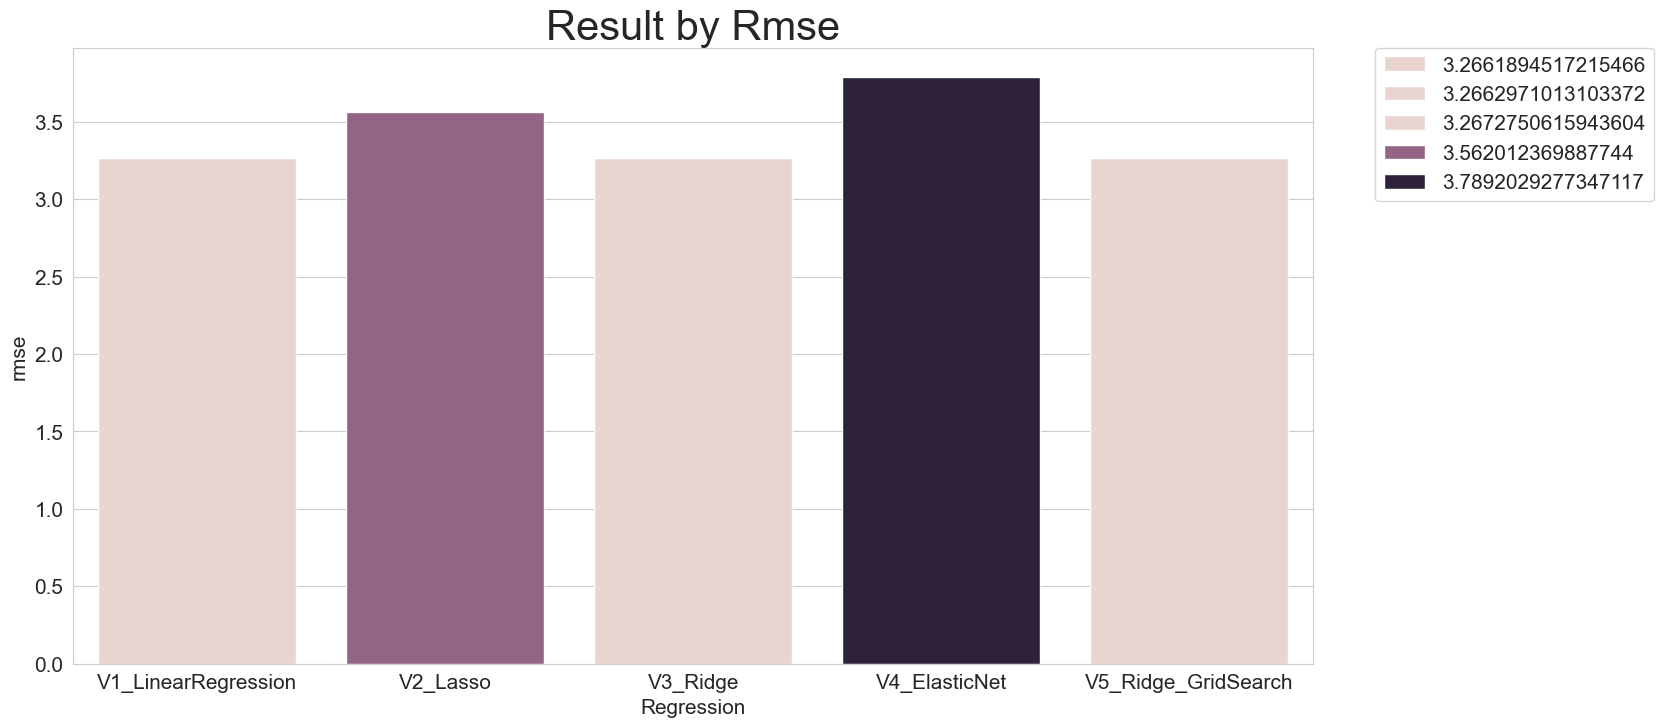

In [220]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'Regression', y = 'Rmse', hue = 'Rmse', data = results,)
ax.set_xlabel('Regression', fontsize = 15)
ax.set_ylabel('rmse', fontsize = 15)
ax.tick_params(labelsize = 15)
ax.set_title('Result by Rmse', fontsize = 30)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

Choice: Model v1 best performance and more sample.

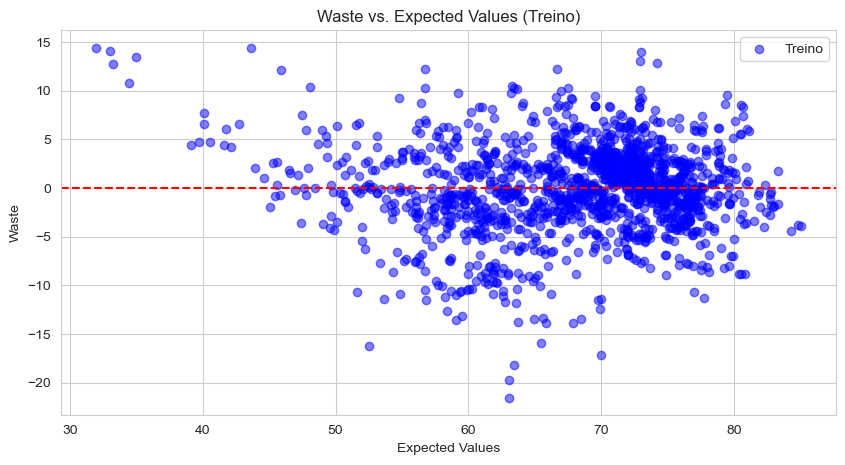

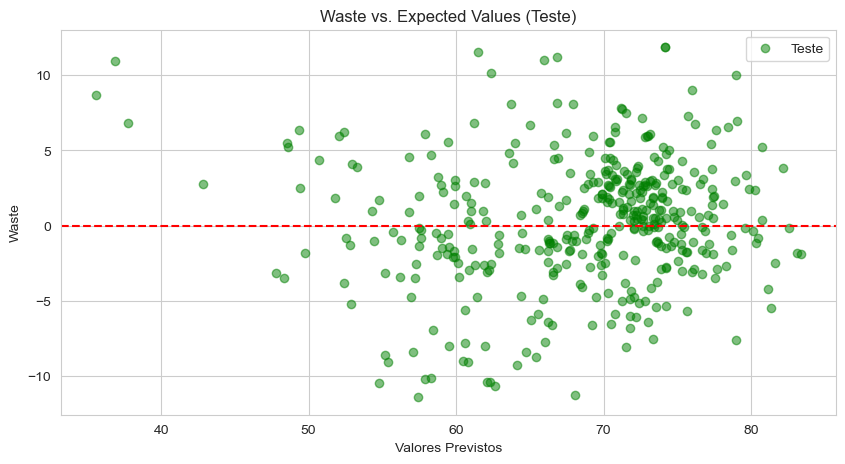

In [221]:
### redisuos

residuos_treino = y_treino - y_pred_treino_v1

# Calculando os resíduos para o conjunto de teste
residuos_teste = y_teste - y_pred_teste_v1

# Plotando os resíduos do conjunto de treino
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_treino_v1, residuos_treino, color = 'blue', label = 'Treino', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Expected Values')
plt.ylabel('Waste')
plt.title('Waste vs. Expected Values (Treino)')
plt.legend()
plt.show()

# Plotando os resíduos do conjunto de teste
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_teste_v1, residuos_teste, color = 'green', label = 'Teste', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Waste')
plt.title('Waste vs. Expected Values (Teste)')
plt.legend()
plt.show()

In these plots, you are looking at:

**Distribution of Residuals**: Ideally, the residuals should be randomly distributed around the horizontal line y=0, indicating that the model is making good predictions on average across all ranges of values.

**Patterns in Residuals**: If you notice specific patterns, such as a curvilinear shape or an increasing or decreasing spread of the residuals as the predicted values ​​increase, this may indicate problems in the model, such as the need for variable transformation or the presence of heteroskedasticity.

Our model is ready for deployment.

#### Deploy with new datas

In [169]:
n_data = pd.read_csv('novos_dados.csv')

In [170]:
n_data

,hiv,adult_mortality,school,thinness_till19,lifestyle,diphtheria
0,0.1,44.2,9.3,12.7,0.922,98.0


In [171]:
n_data_scaled = df_scaler.transform(n_data)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [172]:
n_data_scaled

array([[-0.34334205, -1.02890346, -0.89466713,  1.89639702, -0.84601198,
         0.65780549]])

In [173]:
# Predict
n_predict = model_v1.predict(n_data_scaled)

In [174]:
type(n_predict)

numpy.ndarray

In [175]:
print('New Expectancy Life :', np.round(n_predict, 2))

New Expectancy Life : [[68.12]]
